# Diagnosing Breast Cancer using Julia

##### Loading necessary packages and reading the [dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data).

In [188]:
using CSV
using DataFrames
df = CSV.read("wdbc.csv");

##### Setting Random Seed to produce same output everytime, it helps in debugging

In [189]:
RANDOM_STATE = 100
using Random
Random.seed!(RANDOM_STATE)

MersenneTwister(UInt32[0x00000064], Random.DSFMT.DSFMT_state(Int32[-2036630343, 1072818225, 1299231502, 1073154435, 1563612565, 1073206618, 176198161, 1073683625, 381415896, 1073699088  …  163992627, 1073241259, 385818456, 1072878963, 399273729, 595433664, 390891112, 1704156657, 382, 0]), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], UInt128[0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000  …  0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x0000000000000000

##### First 5 samples of the dataset

In [190]:
first(df,5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
,Int64,String,Float64,Float64,Float64,Float64,Float64
1,842302,M,17.99,10.38,122.8,1001.0,0.1184
2,842517,M,20.57,17.77,132.9,1326.0,0.08474
3,84300903,M,19.69,21.25,130.0,1203.0,0.1096
4,84348301,M,11.42,20.38,77.58,386.1,0.1425
5,84358402,M,20.29,14.34,135.1,1297.0,0.1003


#####  Printing the number of instances and number of columns

In [191]:
# size function returns the number of row and columns of the dataset
row, col = size(df)
println("Number of Instances: ", row)
println("Number of Columns: ", col)

Number of Instances: 569
Number of Columns: 32


##### Headers / Column names of the dataset

In [192]:
println(names(df))

Symbol[:id, :diagnosis, :radius_mean, :texture_mean, :perimeter_mean, :area_mean, :smoothness_mean, :compactness_mean, :concavity_mean, Symbol("concave points_mean"), :symmetry_mean, :fractal_dimension_mean, :radius_se, :texture_se, :perimeter_se, :area_se, :smoothness_se, :compactness_se, :concavity_se, Symbol("concave points_se"), :symmetry_se, :fractal_dimension_se, :radius_worst, :texture_worst, :perimeter_worst, :area_worst, :smoothness_worst, :compactness_worst, :concavity_worst, Symbol("concave points_worst"), :symmetry_worst, :fractal_dimension_worst]


##### Description of dataset

In [193]:
println(describe(df))

32×8 DataFrame
│ Row │ variable                │ mean       │ min       │ median   │ max       │ nunique │ nmissing │ eltype   │
│     │ Symbol                  │ Union…     │ Any       │ Union…   │ Any       │ Union…  │ Nothing  │ DataType │
├─────┼─────────────────────────┼────────────┼───────────┼──────────┼───────────┼─────────┼──────────┼──────────┤
│ 1   │ id                      │ 3.03718e7  │ 8670      │ 906024.0 │ 911320502 │         │          │ Int64    │
│ 2   │ diagnosis               │            │ B         │          │ M         │ 2       │          │ String   │
│ 3   │ radius_mean             │ 14.1273    │ 6.981     │ 13.37    │ 28.11     │         │          │ Float64  │
│ 4   │ texture_mean            │ 19.2896    │ 9.71      │ 18.84    │ 39.28     │         │          │ Float64  │
│ 5   │ perimeter_mean          │ 91.969     │ 43.79     │ 86.24    │ 188.5     │         │          │ Float64  │
│ 6   │ area_mean               │ 654.889    │ 143.5     │ 551.1    │ 250

##### Frequencey of each class

In [194]:
using FreqTables
frequency_digonosis = freqtable(df[:diagnosis])

2-element Named Array{Int64,1}
Dim1  │ 
──────┼────
B     │ 357
M     │ 212

##### Histogram of the frequency of each class

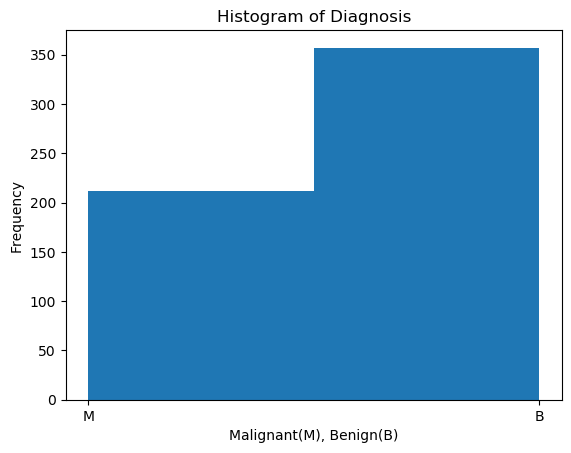

PyObject Text(24.000000000000007, 0.5, 'Frequency')

In [195]:
using PyPlot
PyPlot.plt.hist(df[:diagnosis], 2) 
plt.title("Histogram of Diagnosis")
plt.xlabel("Malignant(M), Benign(B)")
plt.ylabel("Frequency")

## Data Preprocessing

##### Converting the categorical feature "diagnosis" to integer by doing label encoding

In [196]:
using MLLabelUtils
y = convertlabel(LabelEnc.MarginBased,df[:diagnosis])
y = classify.(y, LabelEnc.ZeroOne(Int,1))
newdf = copy(df)
deletecols!(newdf, :diagnosis)
newdf[:diagnosis] = y;

##### Dataset after encodning

In [197]:
first(newdf,5)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
,Int64,Float64,Float64,Float64,Float64,Float64
1,842302,17.99,10.38,122.8,1001.0,0.1184
2,842517,20.57,17.77,132.9,1326.0,0.08474
3,84300903,19.69,21.25,130.0,1203.0,0.1096
4,84348301,11.42,20.38,77.58,386.1,0.1425
5,84358402,20.29,14.34,135.1,1297.0,0.1003


##### Description of Dataset after encodning 

In [198]:
println(describe(newdf))

32×8 DataFrame
│ Row │ variable                │ mean       │ min       │ median   │ max       │ nunique │ nmissing │ eltype   │
│     │ Symbol                  │ Float64    │ Real      │ Float64  │ Real      │ Nothing │ Nothing  │ DataType │
├─────┼─────────────────────────┼────────────┼───────────┼──────────┼───────────┼─────────┼──────────┼──────────┤
│ 1   │ id                      │ 3.03718e7  │ 8670      │ 906024.0 │ 911320502 │         │          │ Int64    │
│ 2   │ radius_mean             │ 14.1273    │ 6.981     │ 13.37    │ 28.11     │         │          │ Float64  │
│ 3   │ texture_mean            │ 19.2896    │ 9.71      │ 18.84    │ 39.28     │         │          │ Float64  │
│ 4   │ perimeter_mean          │ 91.969     │ 43.79     │ 86.24    │ 188.5     │         │          │ Float64  │
│ 5   │ area_mean               │ 654.889    │ 143.5     │ 551.1    │ 2501.0    │         │          │ Float64  │
│ 6   │ smoothness_mean         │ 0.0963603  │ 0.05263   │ 0.09587  │ 0.1

# Spliting the dataset into train, test

##### Shuffling the Dataset

In [199]:
using MLDataUtils
newdf_s = shuffleobs(newdf);
first(newdf_s,10)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
,Int64,Float64,Float64,Float64,Float64,Float64
1,88649001,19.55,28.77,133.6,1207.0,0.0926
2,8612080,12.0,15.65,76.95,443.3,0.09723
3,8810158,13.11,22.54,87.02,529.4,0.1002
4,889403,15.61,19.38,100.0,758.6,0.0784
5,894335,12.43,17.0,78.6,477.3,0.07557
6,871149,10.9,12.96,68.69,366.8,0.07515
7,86135501,14.48,21.46,94.25,648.2,0.09444
8,8810987,13.86,16.93,90.96,578.9,0.1026
9,864018,11.34,21.26,72.48,396.5,0.08759


##### Spliting into train and test

In [200]:
train, test = splitobs(newdf_s, at = 0.70);

##### Seperating the features and class label

In [201]:
X_train = convert(Matrix, train[:,2:31]);
y_train = convert(Matrix, train[:,32:32]);
X_test = convert(Matrix, test[:,2:31]);
y_test = convert(Matrix, test[:,32:32]);

##### Converting (n,1) dimension to (n, ) as per the classifiers requirements

In [202]:
y_train = vec(y_train);
y_test = vec(y_test);

# Applying algorithms to train models 

##### Loading necessary packages and  creating an object of Classifier

In [213]:
using DecisionTree
using ScikitLearn: fit!, predict
rfc = RandomForestClassifier(n_trees = 110, n_subfeatures = 20, max_depth = 7);

##### Fitting the classifiers on training data samples

In [214]:
fit!(rfc, X_train, y_train);

##### predicting the test  data samples

In [215]:
y_pred = predict(rfc, X_test);
println("A portion of prediction:")
y_pred[1:10]

A portion of prediction:


10-element Array{Int64,1}:
 1
 0
 1
 1
 1
 0
 1
 1
 0
 0

# Performance and Results

##### Computing a confusion matrix

In [216]:
cm  = confusion_matrix(y_test, y_pred)

2×2 Array{Int64,2}:
 106   2
   4  59

Classes:  [0, 1]
Matrix:   
Accuracy: 0.9649122807017544
Kappa:    0.9241011984021305

##### Defining functions for calculating different performance metrices

In [217]:
using PyCall
math = pyimport("math")

function accuracy_(tn,fp,fn,tp)
    return ((tp+tn)/(tp+fp+fn+tn))
end

#True Positive Rate or Recall
function sensitivity(tp,fn)
    return (tp / (tp + fn))
end

tprate = sensitivity
recall = sensitivity

#True Negative Rate
function specificity(tn,fp)
    return (tn / (fp + tn))
end

function mcc(tn,fp,fn,tp)
    return (tp*tn-fp*fn)/math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
end

function auc_score(tn,fp,fn,tp)
    return (sensitivity(tp,fn) + specificity(tn,fp)) / 2
end

function gmean_score(tn,fp,fn,tp)
    return math.sqrt(sensitivity(tp,fn) * specificity(tn,fp))
end

function precision(tp, fp)
    return (tp / (tp + fp))
end

function f1score(tp, fp, fn)
    return (2*tp/(2*tp + fp + fn))
end

function fprate(tn,fp)
    return (fp / (fp + tn))
end

fprate (generic function with 1 method)

##### Definfing a function for producing all scores at once.

In [218]:
function getAllScore(tp,tn,fp,fn)
    acc = accuracy_(tn,fp,fn,tp)
    sn = sensitivity(tp,fn)
    sp = specificity(tn,fp)
    auc = auc_score(tn,fp,fn,tp)
    gmean = gmean_score(tn,fp,fn,tp)
    preci = precision(tp, fp)
    f1 = f1score(tp,fp,fn)
    fpr = fprate(tn,fp)
    return acc, sn, sp, auc, gmean, preci, f1, fpr
end

getAllScore (generic function with 1 method)

#### Loading MLBase to compute roc performance parameter 

In [219]:
using MLBase
r = roc(vec(y_test), y_pred)

ROCNums{Int64}
  p = 63
  n = 108
  tp = 59
  tn = 106
  fp = 2
  fn = 4


##### Calling the getAllScore function

In [220]:
allScoresTuples = getAllScore(r.tp, r.tn, r.fp, r.fn)
allScoresArray = [i for i in allScoresTuples]
allScores = transpose(allScoresArray)

1×8 LinearAlgebra.Transpose{Float64,Array{Float64,1}}:
 0.964912  0.936508  0.981481  0.958995  …  0.967213  0.951613  0.0185185

##### Storing the all scores into a dataframe

In [221]:
columnNames = ["accuracy", "sensitivity", "specificity", "auc", "gmean", "precision", "f1_score", "fpr"]
resultDF = DataFrame(allScores, Symbol.(columnNames), )

,accuracy,sensitivity,specificity,auc,gmean,precision,f1_score,fpr
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.964912,0.936508,0.981481,0.958995,0.958731,0.967213,0.951613,0.0185185


# Drawing a ROC curve with auc score

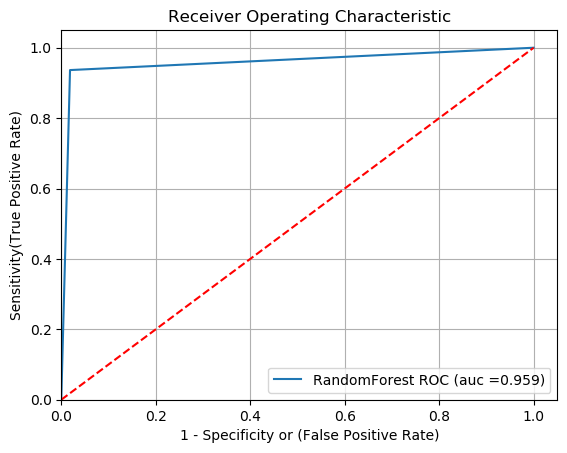

In [226]:
fprArr = [0, fprate(r.tn,r.fp), 1]
tprArr = [0, tprate(r.tp,r.fn), 1]
auc_ = round(auc_score(r.tn,r.fp,r.fn,r.tp), digits=3)
p = plot(fprArr,tprArr,label= string( "RandomForest", " ROC (auc =", auc_, ")" ) )
xlabel("1 - Specificity or (False Positive Rate)")
ylabel("Sensitivity(True Positive Rate)")
plt.plot([0, 1], [0, 1],"r--")
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
PyPlot.title("Receiver Operating Characteristic")
grid("on")
legend()